In [1]:
import pandas as pd

In [2]:
# CREATE WHOLE DF

In [3]:
data = pd.read_csv('data/monday.csv', delimiter = ';', parse_dates=True)
data.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [4]:
data.shape

(4884, 3)

In [5]:
data.dtypes

timestamp      object
customer_no     int64
location       object
dtype: object

In [6]:
# Encode the customer nr and day into one variable
...

In [7]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [8]:
#ENTRANCE
f_datetime = data.groupby("customer_no")["timestamp"].first().reset_index()


# pandas.DataFrame.first - When having a DataFrame with dates as index, 
# this function can select the first few rows based on a date offset.

In [9]:
one_min = pd.Timedelta(minutes=1)

In [10]:
for i in range(len(f_datetime)):
    data = data.append({"timestamp": f_datetime['timestamp'].iloc[i] - one_min, 
                            "customer_no": f_datetime['customer_no'].iloc[i],
                            "location": "entrance"},
                            ignore_index=True)
    

In [11]:
data.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [12]:
data[data['customer_no'] == 1]

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
8,2019-09-02 07:05:00,1,checkout
4884,2019-09-02 07:02:00,1,entrance


In [13]:
# Extract the hour from the timestamp
data["hour"] = data["timestamp"].dt.hour
data["time"] = data["timestamp"].dt.time

In [14]:
# DIFFERENCE BETWEEN CHECKOUT-NO & CUST-NO:
check_c = set(data[data["location"]=="checkout"]["customer_no"].unique()) # number of checked out customers
all_c = set(data["customer_no"].unique()) # number of all customers
diff = all_c.difference(check_c) # difference between all & checked out

In [15]:
diff

{1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447}

In [16]:
#FILL IN 'CHECKOUTS'
for cust in diff:
    data = data.append({"timestamp":"2019-09-02 22:00:00","customer_no":cust,
    "location":"checkout"}, ignore_index=True)

#check again for dtype of 'timestamp'
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [17]:
#NEW COL FOR TIME_SPEND IN LOC
data['time_spend'] = data.sort_values(['customer_no','timestamp']).groupby('customer_no')['timestamp'].diff().shift(-1)

In [18]:
data.head(10)

,timestamp,customer_no,location,hour,time,time_spend
0,2019-09-02 07:03:00,1,dairy,7.0,07:03:00,00:02:00
1,2019-09-02 07:03:00,2,dairy,7.0,07:03:00,00:03:00
2,2019-09-02 07:04:00,3,dairy,7.0,07:04:00,00:02:00
3,2019-09-02 07:04:00,4,dairy,7.0,07:04:00,00:04:00
4,2019-09-02 07:04:00,5,spices,7.0,07:04:00,00:01:00
5,2019-09-02 07:04:00,6,spices,7.0,07:04:00,00:01:00
6,2019-09-02 07:04:00,7,spices,7.0,07:04:00,00:01:00
7,2019-09-02 07:04:00,8,fruit,7.0,07:04:00,00:03:00
8,2019-09-02 07:05:00,1,checkout,7.0,07:05:00,NaT
9,2019-09-02 07:05:00,5,checkout,7.0,07:05:00,NaT


In [19]:
data = data.set_index('timestamp').groupby('customer_no').resample('1min').fillna('ffill').drop(columns='customer_no')

In [20]:
data.head(10)

location  hour      time time_spend
customer_no timestamp                                               
1           2019-09-02 07:02:00  entrance   7.0  07:02:00   00:01:00
            2019-09-02 07:03:00     dairy   7.0  07:03:00   00:02:00
            2019-09-02 07:04:00     dairy   7.0  07:03:00   00:02:00
            2019-09-02 07:05:00  checkout   7.0  07:05:00        NaT
2           2019-09-02 07:02:00  entrance   7.0  07:02:00   00:01:00
            2019-09-02 07:03:00     dairy   7.0  07:03:00   00:03:00
            2019-09-02 07:04:00     dairy   7.0  07:03:00   00:03:00
            2019-09-02 07:05:00     dairy   7.0  07:03:00   00:03:00
            2019-09-02 07:06:00  checkout   7.0  07:06:00        NaT
3           2019-09-02 07:03:00  entrance   7.0  07:03:00   00:01:00

In [21]:
# NEW COL FOR NEXT LOC
data['next_loc'] = data['location'].shift(-1)
data.head(10)

location  hour      time time_spend  next_loc
customer_no timestamp                                                         
1           2019-09-02 07:02:00  entrance   7.0  07:02:00   00:01:00     dairy
            2019-09-02 07:03:00     dairy   7.0  07:03:00   00:02:00     dairy
            2019-09-02 07:04:00     dairy   7.0  07:03:00   00:02:00  checkout
            2019-09-02 07:05:00  checkout   7.0  07:05:00        NaT  entrance
2           2019-09-02 07:02:00  entrance   7.0  07:02:00   00:01:00     dairy
            2019-09-02 07:03:00     dairy   7.0  07:03:00   00:03:00     dairy
            2019-09-02 07:04:00     dairy   7.0  07:03:00   00:03:00     dairy
            2019-09-02 07:05:00     dairy   7.0  07:03:00   00:03:00  checkout
            2019-09-02 07:06:00  checkout   7.0  07:06:00        NaT  entrance
3           2019-09-02 07:03:00  entrance   7.0  07:03:00   00:01:00     dairy

In [22]:
#next_loc for 'checkout'
data.loc[(data.location == 'checkout'), 'next_loc'] = 'checkout'

In [23]:
# calculate transition matrix
transition_matrix = pd.crosstab(data['location'], #or 'before'
                                data['next_loc'],
                                normalize=0)

In [24]:
transition_matrix

next_loc,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.088776,0.746961,0.061634,0.050891,0.051739
drinks,0.208109,0.011236,0.610650,0.090865,0.079140
entrance,0.000000,0.284727,0.160332,0.359364,0.195577
fruit,0.203077,0.086538,0.050000,0.613462,0.046923
spices,0.143429,0.188301,0.173878,0.095353,0.399038


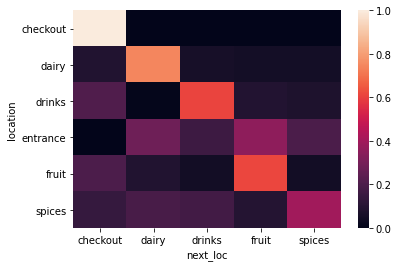

In [25]:
import seaborn as sns
heat_map = sns.heatmap(transition_matrix)

In [26]:
# check if the matrix is correct
transition_matrix.sum(axis=1)

location
checkout    1.0
dairy       1.0
drinks      1.0
entrance    1.0
fruit       1.0
spices      1.0
dtype: float64

In [27]:
data.head(20)

location  hour      time time_spend  next_loc
customer_no timestamp                                                         
1           2019-09-02 07:02:00  entrance   7.0  07:02:00   00:01:00     dairy
            2019-09-02 07:03:00     dairy   7.0  07:03:00   00:02:00     dairy
            2019-09-02 07:04:00     dairy   7.0  07:03:00   00:02:00  checkout
            2019-09-02 07:05:00  checkout   7.0  07:05:00        NaT  checkout
2           2019-09-02 07:02:00  entrance   7.0  07:02:00   00:01:00     dairy
            2019-09-02 07:03:00     dairy   7.0  07:03:00   00:03:00     dairy
            2019-09-02 07:04:00     dairy   7.0  07:03:00   00:03:00     dairy
            2019-09-02 07:05:00     dairy   7.0  07:03:00   00:03:00  checkout
            2019-09-02 07:06:00  checkout   7.0  07:06:00        NaT  checkout
3           2019-09-02 07:03:00  entrance   7.0  07:03:00   00:01:00     dairy
            2019-09-02 07:04:00     dairy   7.0  07:04:00   00:02:00     dairy
            2019-09-02 07:05:00     dairy   7.0  07:04:00   00:02:00  checkout
            2019-09-02 07:06:00  checkout   7.0  07:06:00        NaT  checkout
4           2019-09-02 07:03:00  entrance   7.0  07:03:00   00:01:00     dairy
            2019-09-02 07:04:00     dairy   7.0  07:04:00   00:04:00     dairy
            2019-09-02 07:05:00     dairy   7.0  07:04:00   00:04:00     dairy
            2019-09-02 07:06:00     dairy   7.0  07:04:00   00:04:00     dairy
            2019-09-02 07:07:00     dairy   7.0  07:04:00   00:04:00  checkout
            2019-09-02 07:08:00  checkout   7.0  07:08:00        NaT  checkout
5           2019-09-02 07:03:00  entrance   7.0  07:03:00   00:01:00    spices

### Data Exploration
Calculate the time each customer spent in the market

In [28]:
data.reset_index(inplace=True)
data['entrance_time']=data.groupby('customer_no')['timestamp'].transform(min)
data['checkout_time']=data.groupby('customer_no')['timestamp'].transform(max)
data['time_spent'] = data['checkout_time'] - data['entrance_time']
data.head()

,customer_no,timestamp,location,hour,time,time_spend,next_loc,entrance_time,checkout_time,time_spent
0,1,2019-09-02 07:02:00,entrance,7.0,07:02:00,00:01:00,dairy,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00
1,1,2019-09-02 07:03:00,dairy,7.0,07:03:00,00:02:00,dairy,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00
2,1,2019-09-02 07:04:00,dairy,7.0,07:03:00,00:02:00,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00
3,1,2019-09-02 07:05:00,checkout,7.0,07:05:00,NaT,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00
4,2,2019-09-02 07:02:00,entrance,7.0,07:02:00,00:01:00,dairy,2019-09-02 07:02:00,2019-09-02 07:06:00,00:04:00


### Data Exploration
Calculate the total number of customers in the supermarket over time.

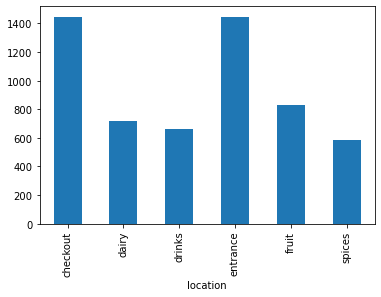

In [29]:
data.groupby('location')['customer_no'].nunique().plot(kind='bar')

In [30]:
data_sns = data.loc[(data['location'] != 'entrance') & (data['location'] != 'checkout'),:].copy()
data_sns=data_sns.groupby(['hour','location']).agg({"customer_no": pd.Series.nunique})
data_sns.head()

customer_no
hour location             
7.0  dairy              52
     drinks             52
     fruit              48
     spices             41
8.0  dairy              59

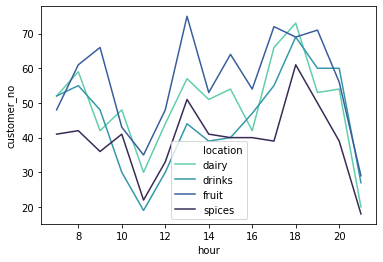

In [31]:
data_sns.reset_index(inplace=True)
import seaborn as sns
sns.lineplot(
data=data_sns, x="hour", y="customer_no", legend="full",
hue="location", palette="mako_r")

### Revenue Estimate
Estimate the total revenue for a customer

In [32]:
data['price']=data['location']
data.price = data.price.map( {'entrance':0 ,'checkout':0,'fruit':4,'spices':3,'dairy':5,'drinks':6} )
data.head()

,customer_no,timestamp,location,hour,time,time_spend,next_loc,entrance_time,checkout_time,time_spent,price
0,1,2019-09-02 07:02:00,entrance,7.0,07:02:00,00:01:00,dairy,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00,0
1,1,2019-09-02 07:03:00,dairy,7.0,07:03:00,00:02:00,dairy,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00,5
2,1,2019-09-02 07:04:00,dairy,7.0,07:03:00,00:02:00,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00,5
3,1,2019-09-02 07:05:00,checkout,7.0,07:05:00,NaT,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,00:03:00,0
4,2,2019-09-02 07:02:00,entrance,7.0,07:02:00,00:01:00,dairy,2019-09-02 07:02:00,2019-09-02 07:06:00,00:04:00,0


In [33]:
pd.DataFrame(data.groupby(by=['customer_no'])["price"].sum())

,price
customer_no,
1,10
2,15
3,10
4,20
5,3
...,...
1443,64
1444,3
1445,55


In [34]:
pd.DataFrame(data.groupby(by=['location'])["price"].sum())

,price
location,
checkout,0
dairy,17685
drinks,12282
entrance,0
fruit,10400
spices,3744


ValueError: DataFrame constructor not properly called!

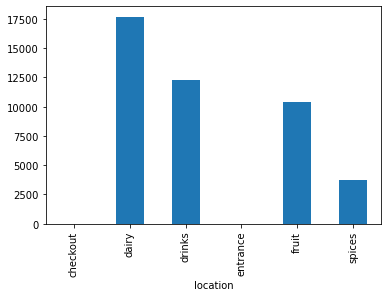

In [35]:
pd.DataFrame(data.groupby(by=['location'])["price"].sum().plot(kind='bar',x='location',y='price'))